Converged at iteration 9
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        1  
2        2  
3        1  
4        2  


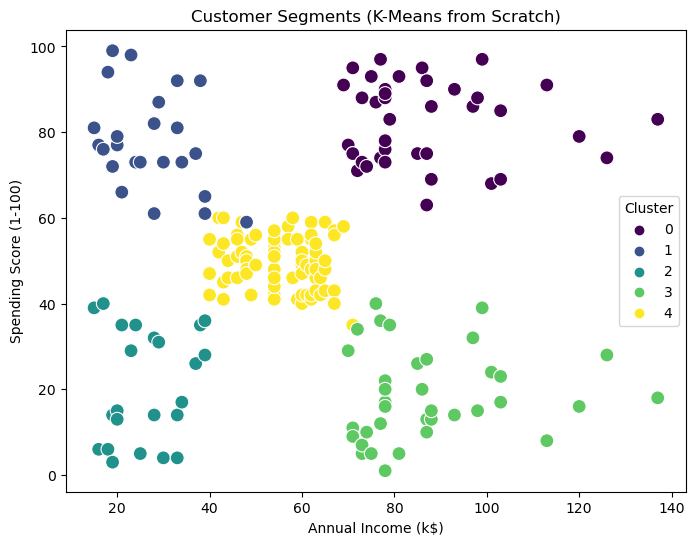

In [4]:
import numpy as np
import pandas as pd

# Load dataset
data = pd.read_csv('Mall_Customers.csv')
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Define the number of clusters
k = 5
max_iterations = 100
tolerance = 1e-4

# Step 1: Initialize centroids randomly
np.random.seed(42)
centroids = features[np.random.choice(features.shape[0], k, replace=False)]

for iteration in range(max_iterations):
    # Step 2: Assign clusters
    distances = np.linalg.norm(features[:, np.newaxis] - centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)

    # Step 3: Update centroids
    new_centroids = np.array([features[cluster_labels == i].mean(axis=0) for i in range(k)])
    
    # Check for convergence
    if np.all(np.abs(new_centroids - centroids) < tolerance):
        print(f"Converged at iteration {iteration}")
        break
    
    centroids = new_centroids

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Display the data with cluster assignments
print(data.head())

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segments (K-Means from Scratch)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
